# Random Forest Regressor
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
df = pd.read_csv('../../dataset/DENSITY-BASED LEARNING/city_lifestyle_dataset.csv')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

X = df[numeric_cols[:-1]].fillna(df[numeric_cols[:-1]].mean()).values
y = df[numeric_cols[-1]].fillna(df[numeric_cols[-1]].mean()).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f'Training shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Training shape: (240, 7)
Test shape: (60, 7)


In [3]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 46.6048
RMSE: 6.8268
MAE: 5.6905
R² Score: 0.3719


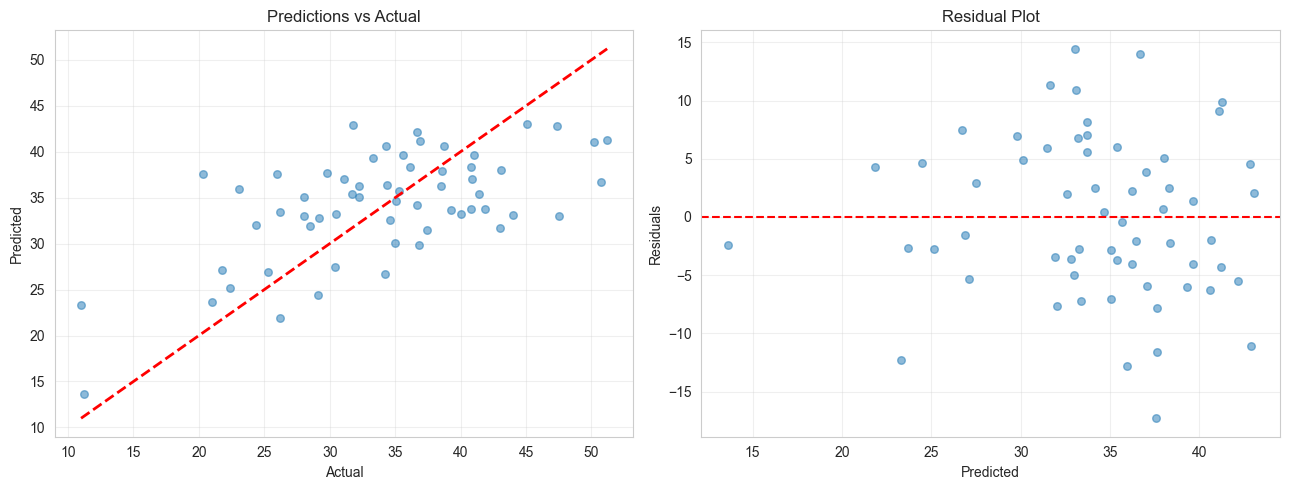

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.scatter(y_test, y_pred, alpha=0.5, s=30)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('Predictions vs Actual')
ax1.grid(alpha=0.3)

residuals = y_test - y_pred
ax2.scatter(y_pred, residuals, alpha=0.5, s=30)
ax2.axhline(0, color='r', linestyle='--')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()